# Battle Of Neighborhoods

## Introduction/Business Problem
Every city is built on different circumstances, environment and different constraints. I am going to compare the neighborhoods of of 2 major columns and how can they be compared with respect to places to eat, better connectivity to several useful regions and how are they distributed around both cities. The places I will be considering are airports, metro, coffee shop, restaurants, schools, college, general stores, hospitals etc. The audience will be tourists who consider travelling through financial capital of the 2 countries analyzed and search for better neighborhoods suited for their needs.

In [46]:
#importing modules
import numpy as np # library to handle data in a vectorized manner

import pandas as pd # library for data analsysis
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', None)

import json # library to handle JSON files

#!conda install -c conda-forge geopy --yes # uncomment this line if you haven't completed the Foursquare API lab
from geopy.geocoders import Nominatim # convert an address into latitude and longitude values

import requests # library to handle requests
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans

#!conda install -c conda-forge folium=0.5.0 --yes # uncomment this line if you haven't completed the Foursquare API lab
import folium # map rendering library
#importing modules
import pandas as pd
import numpy as np
from bs4 import BeautifulSoup
import requests
#!conda install -c conda-forge folium=0.5.0
import folium

print('Libraries imported.')

Libraries imported.


# Data Section
The data used to calculate is available for New york and the other half i.e. for toronto has been been scraped for wikipedia. Both of the dataset consist of the boroughs, neighborhoods and the locations of them. The foursqaure api will be used to analyze the places nearby these neighborhoods and see the proximity of important places from the corresponding neighborhoods.


In [47]:
# importing data sets for both cites
from pandas.io.json import json_normalize # tranform JSON file into a pandas dataframe

# Matplotlib and associated plotting modules
import matplotlib.cm as cm
import matplotlib.colors as colors

# import k-means from clustering stage
from sklearn.cluster import KMeans


# TO SIMPLYFY I WILL JUST USE MANHATTAN AND TORONTO DOWNTOWN

Folium is a great visualization library. Feel free to zoom into the above map, and click on each circle mark to reveal the name of the neighborhood and its respective borough.

However, for illustration purposes, let's simplify the above map and segment and cluster only the neighborhoods in Manhattan. So let's slice the original dataframe and create a new dataframe of the Manhattan data.


In [48]:
# The code was removed by Watson Studio for sharing.

In [49]:
#!pip install wget

In [50]:
#!python -m wget https://audio-previews.elements.envatousercontent.com/files/6319559/preview.mp3 -o sample_f.mp3

In [51]:
!python -m wget https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json -o '/Users/MacbookTT/Downloads/newyork_data.json' 

100% [........................................................] 115774 / 115774
Saved under /Users/MacbookTT/Downloads/newyork_data (1).json


In [52]:
#Dataframe extraction for New York
#!wget -q -O 'https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json

#url="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json"

#!wget -q -O 'newyork_data.json' https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs/newyork_data.json
#print('Data downloaded!')

print('Data downloaded!')
with open('/Users/MacbookTT/Downloads/newyork_data.json') as json_data:
    newyork_data = json.load(json_data)

neighborhoods_data = newyork_data['features']
neighborhoods_data[0]
# define the dataframe columns
column_names = ['Borough', 'Neighborhood', 'Latitude', 'Longitude'] 

# instantiate the dataframe
neighborhoods_ny = pd.DataFrame(columns=column_names)
for data in neighborhoods_data:
    borough = neighborhood_name = data['properties']['borough'] 
    neighborhood_name = data['properties']['name']
        
    neighborhood_latlon = data['geometry']['coordinates']
    neighborhood_lat = neighborhood_latlon[1]
    neighborhood_lon = neighborhood_latlon[0]
    
    neighborhoods_ny = neighborhoods_ny.append({'Borough': borough,
                                          'Neighborhood': neighborhood_name,
                                          'Latitude': neighborhood_lat,
                                          'Longitude': neighborhood_lon}, ignore_index=True)

Data downloaded!


In [53]:
neighborhoods_ny.head(25)

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585
5,Bronx,Kingsbridge,40.881687,-73.902818
6,Manhattan,Marble Hill,40.876551,-73.910660
7,Bronx,Woodlawn,40.898273,-73.867315
8,Bronx,Norwood,40.877224,-73.879391
9,Bronx,Williamsbridge,40.881039,-73.857446


In [54]:
neighborhoods_ny.shape

(306, 4)

In [55]:
neighborhoods_ny.describe()

,Latitude,Longitude
count,306.000000,306.000000
mean,40.701362,-73.946254
std,0.097498,0.121202
min,40.505334,-74.246569
25%,40.617778,-74.000062
50%,40.702969,-73.932009
75%,40.766645,-73.857525
max,40.908543,-73.708847


In [56]:
#Toronto database

In [57]:
url_toronto="https://en.wikipedia.org/wiki/List_of_postal_codes_of_Canada:_M"
source = requests.get(url_toronto).text
soup = BeautifulSoup(source, 'html.parser')

In [58]:
#extracting beautifull soup - code follows also instructions from assignment i.e. if Neighborhood is Not assigned make Neighborhood' equal to Borough

In [59]:
table_contents=[]
table=soup.find('table')
for row in table.findAll('td'):
    cell = {}
    if row.span.text=='Not assigned':
        pass
    else:
        cell['PostalCode'] = row.p.text[:3]
        cell['Borough'] = (row.span.text).split('(')[0]
        cell['Neighborhood'] = (((((row.span.text).split('(')[1]).strip(')')).replace(' /',',')).replace(')',' ')).strip(' ')
        if cell['Neighborhood']=='Not assigned' :
            cell['Neighborhood']=cell['Borough']
        table_contents.append(cell)
        

In [60]:
df=pd.DataFrame(table_contents) #pandas dataframe of Toronto

In [61]:
#Dataframes for toronto and new york 
df.head(15) #Toronto Dataframe

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government
5,M9A,Etobicoke,Islington Avenue
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills North
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


In [62]:
neighborhoods_ny.head(15) # New York Dataframe

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585
5,Bronx,Kingsbridge,40.881687,-73.902818
6,Manhattan,Marble Hill,40.876551,-73.910660
7,Bronx,Woodlawn,40.898273,-73.867315
8,Bronx,Norwood,40.877224,-73.879391
9,Bronx,Williamsbridge,40.881039,-73.857446


In [63]:
print('The New York dataframe has {} boroughs and {} neighborhoods.'.format(
        len(neighborhoods_ny['Borough'].unique()),
        neighborhoods_ny.shape[1]
    )
)

The New York dataframe has 5 boroughs and 4 neighborhoods.


In [64]:

neighborhoods_ny.head(15)

,Borough,Neighborhood,Latitude,Longitude
0,Bronx,Wakefield,40.894705,-73.847201
1,Bronx,Co-op City,40.874294,-73.829939
2,Bronx,Eastchester,40.887556,-73.827806
3,Bronx,Fieldston,40.895437,-73.905643
4,Bronx,Riverdale,40.890834,-73.912585
5,Bronx,Kingsbridge,40.881687,-73.902818
6,Manhattan,Marble Hill,40.876551,-73.910660
7,Bronx,Woodlawn,40.898273,-73.867315
8,Bronx,Norwood,40.877224,-73.879391
9,Bronx,Williamsbridge,40.881039,-73.857446


In [65]:
df.head(15)

,PostalCode,Borough,Neighborhood
0,M3A,North York,Parkwoods
1,M4A,North York,Victoria Village
2,M5A,Downtown Toronto,"Regent Park, Harbourfront"
3,M6A,North York,"Lawrence Manor, Lawrence Heights"
4,M7A,Queen's Park,Ontario Provincial Government
5,M9A,Etobicoke,Islington Avenue
6,M1B,Scarborough,"Malvern, Rouge"
7,M3B,North York,Don Mills North
8,M4B,East York,"Parkview Hill, Woodbine Gardens"
9,M5B,Downtown Toronto,"Garden District, Ryerson"


In [66]:
#My Forsquare credentials
CLIENT_ID = 'IK1BTQPB2XZBC2YN0NWSCHRMAG3PBIEVPGS0ZRJ5JUXILS2I' # your Foursquare ID
CLIENT_SECRET = '50GTUXMX1ELZ3TDGCCL2CARDAAGFONZAEWGYLSICMOVP4NLB' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: IK1BTQPB2XZBC2YN0NWSCHRMAG3PBIEVPGS0ZRJ5JUXILS2I
CLIENT_SECRET:50GTUXMX1ELZ3TDGCCL2CARDAAGFONZAEWGYLSICMOVP4NLB


In [67]:
#it works until here

In [68]:
#using geocode to get coordinates of Toronto (similiar as in LAB):
address = 'Toronto, Canada'
geolocator = Nominatim(user_agent="Toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('Coordinates of {} are Latitude{}, Longitude {}.'.format(address, latitude, longitude))

Coordinates of Toronto, Canada are Latitude43.6534817, Longitude -79.3839347.


In [69]:
#I will refer to boroughs containing name "Toronto" as sugested in the LABs for simlification

In [70]:
toronto = df[df['Borough'].str.contains('Toronto')].reset_index(drop=True)
toronto.shape

(39, 3)

In [71]:
toronto.head()

,PostalCode,Borough,Neighborhood
0,M5A,Downtown Toronto,"Regent Park, Harbourfront"
1,M5B,Downtown Toronto,"Garden District, Ryerson"
2,M5C,Downtown Toronto,St. James Town
3,M4E,East Toronto,The Beaches
4,M5E,Downtown Toronto,Berczy Park


In [72]:
toronto['Borough'].value_counts()

Downtown Toronto                                                17
Central Toronto                                                  9
West Toronto                                                     6
East Toronto                                                     4
East TorontoBusiness reply mail Processing Centre969 Eastern     1
Downtown TorontoStn A PO Boxes25 The Esplanade                   1
East YorkEast Toronto                                            1
Name: Borough, dtype: int64

In [73]:
#getting coordinates - task performed in one of the course labs
geo_coordinates="https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-DS0701EN-SkillsNetwork/labs_v1/Geospatial_Coordinates.csv"
df_toronto_coord = pd.read_csv(geo_coordinates)
df_toronto_coord.head()

,Postal Code,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [74]:
#making same column name in both merged tables
df_toronto_coord2 = df_toronto_coord.rename(columns={"Postal Code" : "PostalCode"})

In [75]:
df_toronto_coord2.head()

,PostalCode,Latitude,Longitude
0,M1B,43.806686,-79.194353
1,M1C,43.784535,-79.160497
2,M1E,43.763573,-79.188711
3,M1G,43.770992,-79.216917
4,M1H,43.773136,-79.239476


In [122]:
toronto_merged = pd.merge(df, df_toronto_coord2, on="PostalCode")

In [123]:
toronto_merged.head()

,PostalCode,Borough,Neighborhood,Latitude,Longitude
0,M3A,North York,Parkwoods,43.753259,-79.329656
1,M4A,North York,Victoria Village,43.725882,-79.315572
2,M5A,Downtown Toronto,"Regent Park, Harbourfront",43.654260,-79.360636
3,M6A,North York,"Lawrence Manor, Lawrence Heights",43.718518,-79.464763
4,M7A,Queen's Park,Ontario Provincial Government,43.662301,-79.389494


In [78]:


#using geocode to get coordinates of Toronto (similiar as in LAB):
address = 'Toronto, Canada'
geolocator = Nominatim(user_agent="Toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('Coordinates of {} are Latitude{}, Longitude {}.'.format(address, latitude, longitude))

Coordinates of Toronto, Canada are Latitude43.6534817, Longitude -79.3839347.


In [79]:
# create map of Toronto using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

Folium is a great visualization library. Feel free to zoom into the above map, and click on each circle mark to reveal the name of the neighborhood and its respective borough.

However, for illustration purposes, let's simplify the above map and segment and cluster only the neighborhoods in Manhattan. So let's slice the original dataframe and create a new dataframe of the Manhattan data.

In [80]:
#next cell code changed to markdown

# create map of Manhattan using latitude and longitude values
map_toronto = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(toronto['Latitude'], toronto['Longitude'], toronto['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_toronto)  
    
map_toronto

In [81]:
#####code works till here

In [82]:
#using geocode to get coordinates of Toronto (similiar as in LAB):
address = 'Toronto, Canada'
geolocator = Nominatim(user_agent="Toronto_explorer")
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('Coordinates of {} are Latitude{}, Longitude {}.'.format(address, latitude, longitude))

Coordinates of Toronto, Canada are Latitude43.6534817, Longitude -79.3839347.


In [85]:
#Similiar work for Manhattan - used for simplification

In [86]:
manhattan_data = neighborhoods_ny[neighborhoods_ny['Borough'] == 'Manhattan'].reset_index(drop=True)
manhattan_data.shape

(40, 4)

In [87]:
manhattan_data.head()

,Borough,Neighborhood,Latitude,Longitude
0,Manhattan,Marble Hill,40.876551,-73.910660
1,Manhattan,Chinatown,40.715618,-73.994279
2,Manhattan,Washington Heights,40.851903,-73.936900
3,Manhattan,Inwood,40.867684,-73.921210
4,Manhattan,Hamilton Heights,40.823604,-73.949688


In [88]:

address = 'Manhattan, NY'

geolocator = Nominatim(user_agent="Toronto_explorer")
# original # geolocator = Nominatim()
location = geolocator.geocode(address)
latitude = location.latitude
longitude = location.longitude
print('The geograpical coordinate of Manhattan are {}, {}.'.format(latitude, longitude))
# create map of Manhattan using latitude and longitude values
map_manhattan = folium.Map(location=[latitude, longitude], zoom_start=11)

# add markers to map
for lat, lng, label in zip(manhattan_data['Latitude'], manhattan_data['Longitude'], manhattan_data['Neighborhood']):
    label = folium.Popup(label, parse_html=True)
    folium.CircleMarker(
        [lat, lng],
        radius=5,
        popup=label,
        color='blue',
        fill=True,
        fill_color='#3186cc',
        fill_opacity=0.7,
        parse_html=False).add_to(map_manhattan)  
    
map_manhattan

The geograpical coordinate of Manhattan are 40.7896239, -73.9598939.


## Methodology Section

#### Define Foursquare Credentials and Version

In [89]:
#My Forsquare credentials
CLIENT_ID = 'IK1BTQPB2XZBC2YN0NWSCHRMAG3PBIEVPGS0ZRJ5JUXILS2I' # your Foursquare ID
CLIENT_SECRET = '50GTUXMX1ELZ3TDGCCL2CARDAAGFONZAEWGYLSICMOVP4NLB' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version
LIMIT = 100 # A default Foursquare API limit value

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

Your credentails:
CLIENT_ID: IK1BTQPB2XZBC2YN0NWSCHRMAG3PBIEVPGS0ZRJ5JUXILS2I
CLIENT_SECRET:50GTUXMX1ELZ3TDGCCL2CARDAAGFONZAEWGYLSICMOVP4NLB


In [90]:
###below code changed to markdown

CLIENT_ID = 'TABHGZSJZA3LYUX3HJXSNNDTEDWH5K2TP2UV4YMZME0OFYGM' # your Foursquare ID
CLIENT_SECRET = '14TTXYGOOXBTCC5NMOO2JG4OAB502JQBEMHAZQGJ2IERKER1' # your Foursquare Secret
VERSION = '20180605' # Foursquare API version

print('Your credentails:')
print('CLIENT_ID: ' + CLIENT_ID)
print('CLIENT_SECRET:' + CLIENT_SECRET)

In [91]:
#Same function as in the LAB to getNearbyVenues

In [121]:
LIMIT = 100
radius = 500

def getNearbyVenues(names, latitudes, longitudes, radius=500):
    
    venues_list=[]
    for name, lat, lng in zip(names, latitudes, longitudes):
        print(name)
            
        # create the API request URL
        url = 'https://api.foursquare.com/v2/venues/explore?&client_id={}&client_secret={}&v={}&ll={},{}&radius={}&limit={}'.format(
            CLIENT_ID, 
            CLIENT_SECRET, 
            VERSION, 
            lat, 
            lng, 
            radius, 
            LIMIT)
            
        # make the GET request
        results = requests.get(url).json()["response"]['groups'][0]['items']
        
        # return only relevant information for each nearby venue
        venues_list.append([(
            name, 
            lat, 
            lng, 
            v['venue']['name'], 
            v['venue']['location']['lat'], 
            v['venue']['location']['lng'],  
            v['venue']['categories'][0]['name']) for v in results])

    nearby_venues = pd.DataFrame([item for venue_list in venues_list for item in venue_list])
    nearby_venues.columns = ['Neighborhood', 
                  'Neighborhood Latitude', 
                  'Neighborhood Longitude', 
                  'Venue', 
                  'Venue Latitude', 
                  'Venue Longitude', 
                  'Venue Category']
    
    return(nearby_venues)

In [93]:
manhattan_venues = getNearbyVenues(names=manhattan_data['Neighborhood'],
                                   latitudes=manhattan_data['Latitude'],
                                   longitudes=manhattan_data['Longitude']
                                  )


Marble Hill
Chinatown
Washington Heights
Inwood
Hamilton Heights
Manhattanville
Central Harlem
East Harlem
Upper East Side
Yorkville
Lenox Hill
Roosevelt Island
Upper West Side
Lincoln Square
Clinton
Midtown
Murray Hill
Chelsea
Greenwich Village
East Village
Lower East Side
Tribeca
Little Italy
Soho
West Village
Manhattan Valley
Morningside Heights
Gramercy
Battery Park City
Financial District
Carnegie Hill
Noho
Civic Center
Midtown South
Sutton Place
Turtle Bay
Tudor City
Stuyvesant Town
Flatiron
Hudson Yards


In [94]:
manhattan_venues.shape

(3239, 7)

In [96]:
manhattan_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Marble Hill,40.876551,-73.91066,Bikram Yoga,40.876844,-73.906204,Yoga Studio
1,Marble Hill,40.876551,-73.91066,Arturo's,40.874412,-73.910271,Pizza Place
2,Marble Hill,40.876551,-73.91066,Tibbett Diner,40.880404,-73.908937,Diner
3,Marble Hill,40.876551,-73.91066,Dunkin',40.877136,-73.906666,Donut Shop
4,Marble Hill,40.876551,-73.91066,Astral Fitness & Wellness Center,40.876705,-73.906372,Gym


In [105]:
mht_bar1=manhattan_venues["Venue Category"].value_counts()
mht_bar1.head(10)

Coffee Shop            144
Italian Restaurant     133
Café                    77
Pizza Place             77
American Restaurant     77
Bakery                  77
Park                    73
Hotel                   69
Bar                     66
Mexican Restaurant      58
Name: Venue Category, dtype: int64

In [132]:
dfmht=pd.DataFrame(mht_bar1)
dfmht.head(15)

,Venue Category
Coffee Shop,144
Italian Restaurant,133
Café,77
Pizza Place,77
American Restaurant,77
Bakery,77
Park,73
Hotel,69
Bar,66
Mexican Restaurant,58


In [108]:
import matplotlib.pyplot as plt

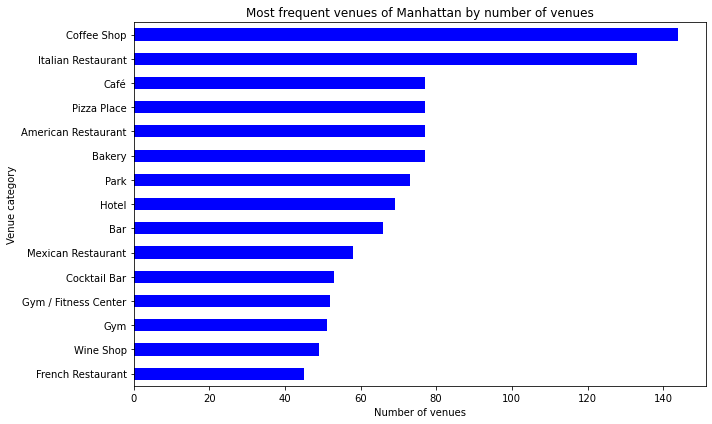

In [204]:
#fig, ax = plt.subplots(figsize=fig_size, facecolor=fig_fc)
ax = mht_bar1.head(15).plot(kind='barh', color="blue", figsize=(10, 6));
ax.invert_yaxis()
plt.xlabel('Number of venues') # add to x-label to the plot
plt.ylabel('Venue category') # add y-label to the plot
plt.title('Most frequent venues of Manhattan by number of venues') # add title to the plot
plt.tight_layout()


In [124]:
toronto_venues = getNearbyVenues(names=toronto_merged['Neighborhood'],
                                   latitudes=toronto_merged['Latitude'],
                                   longitudes=toronto_merged['Longitude']
                                )
toronto_venues.shape

Parkwoods
Victoria Village
Regent Park, Harbourfront
Lawrence Manor, Lawrence Heights
Ontario Provincial Government
Islington Avenue
Malvern, Rouge
Don Mills North
Parkview Hill, Woodbine Gardens
Garden District, Ryerson
Glencairn
West Deane Park, Princess Gardens, Martin Grove, Islington, Cloverdale
Rouge Hill, Port Union, Highland Creek
Don Mills South
Woodbine Heights
St. James Town
Humewood-Cedarvale
Eringate, Bloordale Gardens, Old Burnhamthorpe, Markland Wood
Guildwood, Morningside, West Hill
The Beaches
Berczy Park
Caledonia-Fairbanks
Woburn
Leaside
Central Bay Street
Christie
Cedarbrae
Hillcrest Village
Bathurst Manor, Wilson Heights, Downsview North
Thorncliffe Park
Richmond, Adelaide, King
Dufferin, Dovercourt Village
Scarborough Village
Fairview, Henry Farm, Oriole
Northwood Park, York University
The Danforth  East
Harbourfront East, Union Station, Toronto Islands
Little Portugal, Trinity
Kennedy Park, Ionview, East Birchmount Park
Bayview Village
Downsview East
The Danforth

(2128, 7)

In [126]:
toronto_venues.head()

,Neighborhood,Neighborhood Latitude,Neighborhood Longitude,Venue,Venue Latitude,Venue Longitude,Venue Category
0,Parkwoods,43.753259,-79.329656,Brookbanks Park,43.751976,-79.332140,Park
1,Parkwoods,43.753259,-79.329656,KFC,43.754387,-79.333021,Fast Food Restaurant
2,Parkwoods,43.753259,-79.329656,Variety Store,43.751974,-79.333114,Food & Drink Shop
3,Victoria Village,43.725882,-79.315572,Victoria Village Arena,43.723481,-79.315635,Hockey Arena
4,Victoria Village,43.725882,-79.315572,Tim Hortons,43.725517,-79.313103,Coffee Shop


In [127]:
trt_bar1=toronto_venues["Venue Category"].value_counts()
trt_bar1.head(10)

Coffee Shop            190
Café                    94
Restaurant              65
Park                    54
Pizza Place             48
Italian Restaurant      46
Hotel                   43
Bakery                  41
Japanese Restaurant     41
Sandwich Place          37
Name: Venue Category, dtype: int64

In [131]:
dftrt=pd.DataFrame(trt_bar1)
dftrt.head(15)

,Venue Category
Coffee Shop,190
Café,94
Restaurant,65
Park,54
Pizza Place,48
Italian Restaurant,46
Hotel,43
Bakery,41
Japanese Restaurant,41
Sandwich Place,37


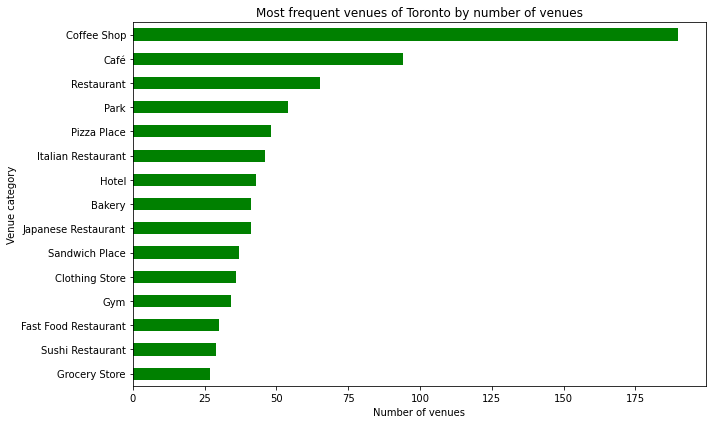

In [205]:
#fig, ax = plt.subplots(figsize=fig_size, facecolor=fig_fc)
ax = trt_bar1.head(15).plot(kind='barh', color="green", figsize=(10, 6));
ax.invert_yaxis()
plt.xlabel('Number of venues') # add to x-label to the plot
plt.ylabel('Venue category') # add y-label to the plot
plt.title('Most frequent venues of Toronto by number of venues') # add title to the plot
plt.tight_layout()

In [ ]:
#CHECK EXPLORATORY ANALYSIS

In [65]:
#######

In [206]:
# one hot encoding Toronto
toronto_onehot = pd.get_dummies(toronto_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
toronto_onehot['Neighborhood'] = toronto_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [toronto_onehot.columns[-1]] + list(toronto_onehot.columns[:-1])
toronto_onehot = toronto_onehot[fixed_columns]
toronto_grouped = toronto_onehot.groupby('Neighborhood').mean().reset_index()
toronto_onehot.shape

(2128, 272)

In [207]:
# one hot encoding Manhattan
manhattan_onehot = pd.get_dummies(manhattan_venues[['Venue Category']], prefix="", prefix_sep="")

# add neighborhood column back to dataframe
manhattan_onehot['Neighborhood'] = manhattan_venues['Neighborhood'] 

# move neighborhood column to the first column
fixed_columns = [manhattan_onehot.columns[-1]] + list(manhattan_onehot.columns[:-1])
manhattan_onehot = manhattan_onehot[fixed_columns]
manhattan_grouped = manhattan_onehot.groupby('Neighborhood').mean().reset_index()

manhattan_onehot.shape

(3239, 328)

In [208]:
manhattan_onehot.head()

,Neighborhood,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach Bar,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,Comedy Club,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dive Shop,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Hill,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundromat,Laundry Service,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Peruvian Roast Chicken Joint,Pet Café,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Piano Bar,Pie Shop,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Post Office,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Rock Climbing Spot,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Skate Park,Smoke Shop,Snack Place,Soccer Field,Social Club,Soup Place,South A

In [209]:
#Below code til graph extracts how many neighborhoods contains most popular venues venues

In [221]:
mht_g1 = manhattan_onehot.groupby('Neighborhood').max().reset_index()
mht_g1.head(10)

,Neighborhood,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach Bar,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,Comedy Club,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dive Shop,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Hill,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundromat,Laundry Service,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Peruvian Roast Chicken Joint,Pet Café,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Piano Bar,Pie Shop,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Post Office,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Rock Climbing Spot,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Skate Park,Smoke Shop,Snack Place,Soccer Field,Social Club,Soup Place,South A

In [212]:
mht_g1.shape

(40, 328)

In [213]:
mht_g1["Coffee Shop"].sum() # in how many neighborhoods coffee shops exists

39

In [214]:
print("Number of neighborhoods in Mahatan =", mht_g1.shape[0])

Number of neighborhoods in Mahatan = 40


In [215]:
mht_g3 = manhattan_onehot.groupby('Neighborhood').sum()

In [216]:
mht_g3.head()

,Accessories Store,Adult Boutique,African Restaurant,American Restaurant,Antique Shop,Argentinian Restaurant,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auditorium,Australian Restaurant,Austrian Restaurant,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Basketball Court,Beach Bar,Beer Bar,Beer Garden,Beer Store,Big Box Store,Bike Rental / Bike Share,Bike Shop,Bike Trail,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Boxing Gym,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bridge,Bubble Tea Shop,Building,Burger Joint,Burrito Place,Bus Line,Bus Station,Bus Stop,Butcher,Cafeteria,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Cantonese Restaurant,Caribbean Restaurant,Check Cashing Service,Cheese Shop,Chinese Restaurant,Chocolate Shop,Circus,Climbing Gym,Clothing Store,Club House,Cocktail Bar,Coffee Shop,College Academic Building,College Arts Building,College Bookstore,College Cafeteria,Comedy Club,Community Center,Concert Hall,Convenience Store,Cooking School,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Cycle Studio,Czech Restaurant,Dance Studio,Daycare,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Dive Bar,Dive Shop,Doctor's Office,Dog Run,Donut Shop,Drugstore,Dry Cleaner,Dumpling Restaurant,Duty-free Shop,Eastern European Restaurant,Egyptian Restaurant,Electronics Store,Empanada Restaurant,English Restaurant,Ethiopian Restaurant,Event Space,Exhibit,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,German Restaurant,Gift Shop,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Gym Pool,Gymnastics Gym,Harbor / Marina,Hardware Store,Hawaiian Restaurant,Health & Beauty Service,Health Food Store,Heliport,High School,Hill,Himalayan Restaurant,Historic Site,History Museum,Hobby Shop,Hookah Bar,Hostel,Hot Dog Joint,Hotel,Hotel Bar,Hotpot Restaurant,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Indie Theater,Irish Pub,Israeli Restaurant,Italian Restaurant,Japanese Curry Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Jewish Restaurant,Juice Bar,Karaoke Bar,Kebab Restaurant,Kids Store,Korean Restaurant,Kosher Restaurant,Latin American Restaurant,Laundromat,Laundry Service,Lebanese Restaurant,Library,Lingerie Store,Liquor Store,Lounge,Malay Restaurant,Market,Martial Arts School,Massage Studio,Mattress Store,Medical Center,Mediterranean Restaurant,Memorial Site,Men's Store,Mexican Restaurant,Middle Eastern Restaurant,Mini Golf,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motorcycle Shop,Movie Theater,Museum,Music School,Music Store,Music Venue,Nail Salon,New American Restaurant,Newsstand,Nightclub,Non-Profit,Noodle House,North Indian Restaurant,Office,Opera House,Optical Shop,Organic Grocery,Outdoor Sculpture,Outdoors & Recreation,Paella Restaurant,Paper / Office Supplies Store,Park,Pedestrian Plaza,Performing Arts Venue,Persian Restaurant,Peruvian Restaurant,Peruvian Roast Chicken Joint,Pet Café,Pet Store,Pharmacy,Photography Studio,Physical Therapist,Piano Bar,Pie Shop,Pier,Pilates Studio,Pizza Place,Playground,Plaza,Poke Place,Pool,Post Office,Pub,Public Art,Ramen Restaurant,Record Shop,Rental Car Location,Residential Building (Apartment / Condo),Resort,Rest Area,Restaurant,Rock Climbing Spot,Rock Club,Roof Deck,Russian Restaurant,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scandinavian Restaurant,Scenic Lookout,School,Seafood Restaurant,Shanghai Restaurant,Shipping Store,Shoe Repair,Shoe Store,Shopping Mall,Skate Park,Smoke Shop,Snack Place,Soccer Field,Social Club,Soup Place,South American Resta

In [217]:
mht_bar2=mht_g1.drop('Neighborhood', axis=1).sum().sort_values(ascending=False)

In [218]:
mht_bar2.head(15)

Coffee Shop             39
Italian Restaurant      33
Pizza Place             33
Bakery                  32
Café                    32
American Restaurant     30
Bar                     28
Park                    28
Gym                     27
Mexican Restaurant      27
French Restaurant       26
Wine Shop               25
Seafood Restaurant      25
Burger Joint            25
Gym / Fitness Center    24
dtype: int64

In [219]:
#Graph represents how many neiberhoods contains certain most popular Venues

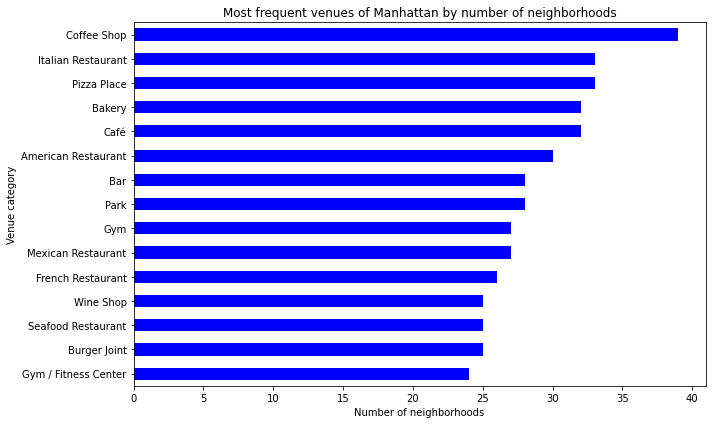

In [220]:
#fig, ax = plt.subplots(figsize=fig_size, facecolor=fig_fc)
ax = mht_bar2.head(15).plot(kind='barh', color="blue", figsize=(10, 6));
ax.invert_yaxis()
plt.xlabel('Number of neighborhoods') # add to x-label to the plot
plt.ylabel('Venue category') # add y-label to the plot
plt.title('Most frequent venues of Manhattan by number of neighborhoods') # add title to the plot
plt.tight_layout()

In [222]:
#repeat for Toronto

In [223]:
trt_g1 = toronto_onehot.groupby('Neighborhood').max().reset_index()
trt_g1.head(10)

,Neighborhood,Yoga Studio,Accessories Store,Adult Boutique,Afghan Restaurant,Airport,Airport Food Court,Airport Lounge,Airport Service,Airport Terminal,American Restaurant,Antique Shop,Aquarium,Art Gallery,Art Museum,Arts & Crafts Store,Asian Restaurant,Athletics & Sports,Auto Garage,Auto Workshop,BBQ Joint,Baby Store,Bagel Shop,Bakery,Bank,Bar,Baseball Field,Baseball Stadium,Basketball Court,Basketball Stadium,Beach,Bed & Breakfast,Beer Bar,Beer Store,Belgian Restaurant,Bike Shop,Bistro,Board Shop,Boat or Ferry,Bookstore,Boutique,Brazilian Restaurant,Breakfast Spot,Brewery,Bridal Shop,Bubble Tea Shop,Burger Joint,Burrito Place,Bus Line,Bus Station,Butcher,Cable Car,Café,Cajun / Creole Restaurant,Camera Store,Candy Store,Caribbean Restaurant,Cheese Shop,Chinese Restaurant,Chocolate Shop,Church,Climbing Gym,Clothing Store,Cocktail Bar,Coffee Shop,College Arts Building,College Auditorium,College Gym,College Rec Center,College Stadium,Colombian Restaurant,Comfort Food Restaurant,Comic Shop,Concert Hall,Construction & Landscaping,Convenience Store,Cosmetics Shop,Coworking Space,Creperie,Cuban Restaurant,Cupcake Shop,Curling Ice,Dance Studio,Deli / Bodega,Department Store,Dessert Shop,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop,Drugstore,Dumpling Restaurant,Eastern European Restaurant,Electronics Store,Escape Room,Ethiopian Restaurant,Event Space,Falafel Restaurant,Farmers Market,Fast Food Restaurant,Field,Filipino Restaurant,Fish & Chips Shop,Fish Market,Flea Market,Flower Shop,Food & Drink Shop,Food Court,Food Truck,Fountain,French Restaurant,Fried Chicken Joint,Frozen Yogurt Shop,Fruit & Vegetable Store,Furniture / Home Store,Gaming Cafe,Garden,Garden Center,Gas Station,Gastropub,Gay Bar,General Entertainment,General Travel,German Restaurant,Gift Shop,Gluten-free Restaurant,Golf Course,Gourmet Shop,Greek Restaurant,Grocery Store,Gym,Gym / Fitness Center,Hakka Restaurant,Harbor / Marina,Hardware Store,Health & Beauty Service,Health Food Store,Historic Site,History Museum,Hobby Shop,Hockey Arena,Home Service,Hookah Bar,Hospital,Hostel,Hotel,Hotel Bar,Housing Development,IT Services,Ice Cream Shop,Indian Restaurant,Indie Movie Theater,Intersection,Irish Pub,Italian Restaurant,Japanese Restaurant,Jazz Club,Jewelry Store,Juice Bar,Kids Store,Knitting Store,Korean BBQ Restaurant,Korean Restaurant,Lake,Latin American Restaurant,Light Rail Station,Lingerie Store,Liquor Store,Lounge,Luggage Store,Market,Martial Arts School,Massage Studio,Medical Center,Mediterranean Restaurant,Men's Store,Metro Station,Mexican Restaurant,Middle Eastern Restaurant,Miscellaneous Shop,Mobile Phone Shop,Modern European Restaurant,Molecular Gastronomy Restaurant,Monument / Landmark,Moroccan Restaurant,Motel,Movie Theater,Museum,Music Venue,New American Restaurant,Nightclub,Noodle House,Office,Opera House,Optical Shop,Organic Grocery,Other Great Outdoors,Park,Performing Arts Venue,Pet Store,Pharmacy,Pizza Place,Plane,Playground,Plaza,Poke Place,Pool,Portuguese Restaurant,Post Office,Poutine Place,Pub,Ramen Restaurant,Record Shop,Recording Studio,Rental Car Location,Restaurant,River,Roof Deck,Sake Bar,Salad Place,Salon / Barbershop,Sandwich Place,Scenic Lookout,Sculpture Garden,Seafood Restaurant,Shoe Store,Shopping Mall,Shopping Plaza,Skate Park,Skating Rink,Smoke Shop,Smoothie Shop,Snack Place,Soccer Field,Soup Place,Spa,Speakeasy,Sporting Goods Shop,Sports Bar,Stadium,Stationery Store,Steakhouse,Strip Club,Supermarket,Supplement Shop,Sushi Restaurant,Swim School,Taco Place,Tailor Shop,Taiwanese Restaurant,Tanning Salon,Tea Room,Tennis Court,Thai Restaurant,Theater,Theme Restaurant,Tibetan Restaurant,Toy / Game Store,Trail,Train Station,Truck Stop,Vegetarian / Vegan Restaurant,Video Game Store,Vietnamese Restaurant,Warehouse Store,Wine Bar,Wine Shop,Wings Joint,Women's Store
0,Agincourt,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1

In [224]:
trt_g1["Coffee Shop"].sum() # in how many neighborhoods coffee shops exists

45

In [ ]:
print("Number of neighborhoods in Mahatan =", mht_g1.shape[0])

In [227]:
trt_bar2=trt_g1.drop('Neighborhood', axis=1).sum().sort_values(ascending=False)

In [228]:
trt_bar2.head(15)

Coffee Shop             45
Park                    42
Restaurant              35
Café                    34
Pizza Place             34
Sandwich Place          30
Bakery                  28
Italian Restaurant      26
Bank                    24
Fast Food Restaurant    23
Japanese Restaurant     22
Gym                     22
Pharmacy                21
Grocery Store           20
Bar                     20
dtype: int64

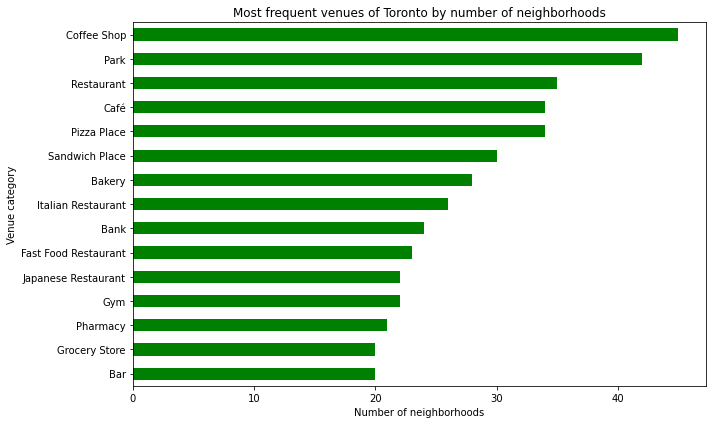

In [230]:
#fig, ax = plt.subplots(figsize=fig_size, facecolor=fig_fc)
ax = trt_bar2.head(15).plot(kind='barh', color="green", figsize=(10, 6));
ax.invert_yaxis()
plt.xlabel('Number of neighborhoods') # add to x-label to the plot
plt.ylabel('Venue category') # add y-label to the plot
plt.title('Most frequent venues of Toronto by number of neighborhoods') # add title to the plot
plt.tight_layout()

In [231]:
def return_most_common_venues(row, num_top_venues):
    row_categories = row.iloc[1:]
    row_categories_sorted = row_categories.sort_values(ascending=False)
    
    return row_categories_sorted.index.values[0:num_top_venues]


In [232]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted_manhattan = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted_manhattan['Neighborhood'] = manhattan_grouped['Neighborhood']

for ind in np.arange(manhattan_grouped.shape[0]):
    neighborhoods_venues_sorted_manhattan.iloc[ind, 1:] = return_most_common_venues(manhattan_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted_manhattan.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Battery Park City,Park,Hotel,Coffee Shop,Clothing Store,Gym,Playground,Memorial Site,Food Court,Shopping Mall,Sandwich Place
1,Carnegie Hill,Coffee Shop,Café,Wine Shop,Pizza Place,Gym,French Restaurant,Yoga Studio,Bookstore,Bar,Cocktail Bar
2,Central Harlem,Seafood Restaurant,Public Art,African Restaurant,American Restaurant,French Restaurant,Bar,Gym / Fitness Center,Chinese Restaurant,Music Venue,Spa
3,Chelsea,Coffee Shop,Bakery,Art Gallery,American Restaurant,French Restaurant,Wine Shop,Hotel,Ice Cream Shop,Seafood Restaurant,Thai Restaurant
4,Chinatown,Chinese Restaurant,Bakery,Cocktail Bar,American Restaurant,Salon / Barbershop,Spa,Optical Shop,Dessert Shop,Ice Cream Shop,Hotpot Restaurant


In [233]:
num_top_venues = 10

indicators = ['st', 'nd', 'rd']

# create columns according to number of top venues
columns = ['Neighborhood']
for ind in np.arange(num_top_venues):
    try:
        columns.append('{}{} Most Common Venue'.format(ind+1, indicators[ind]))
    except:
        columns.append('{}th Most Common Venue'.format(ind+1))

# create a new dataframe
neighborhoods_venues_sorted_toronto = pd.DataFrame(columns=columns)
neighborhoods_venues_sorted_toronto['Neighborhood'] = toronto_grouped['Neighborhood']

for ind in np.arange(toronto_grouped.shape[0]):
    neighborhoods_venues_sorted_toronto.iloc[ind, 1:] = return_most_common_venues(toronto_grouped.iloc[ind, :], num_top_venues)

neighborhoods_venues_sorted_toronto.head()

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Agincourt,Lounge,Latin American Restaurant,Clothing Store,Breakfast Spot,Ethiopian Restaurant,Escape Room,Electronics Store,Event Space,Eastern European Restaurant,Dim Sum Restaurant
1,"Alderwood, Long Branch",Pizza Place,Pharmacy,Gym,Coffee Shop,Athletics & Sports,Sandwich Place,Pub,Distribution Center,Dim Sum Restaurant,Diner
2,"Bathurst Manor, Wilson Heights, Downsview North",Bank,Coffee Shop,Intersection,Supermarket,Deli / Bodega,Sushi Restaurant,Ice Cream Shop,Shopping Mall,Mobile Phone Shop,Restaurant
3,Bayview Village,Café,Japanese Restaurant,Bank,Chinese Restaurant,Dim Sum Restaurant,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop
4,"Bedford Park, Lawrence Manor East",Sandwich Place,Restaurant,Coffee Shop,Italian Restaurant,Pizza Place,Boutique,Liquor Store,Juice Bar,Fast Food Restaurant,Japanese Restaurant


# Clustering Neighborhoods 

In [234]:
# set number of clusters
kclusters = 5

manhattan_grouped_clustering = manhattan_grouped.drop('Neighborhood', 1)

# run k-means clustering
kmeans_manhattan = KMeans(n_clusters=kclusters, random_state=0).fit(manhattan_grouped_clustering)

# check cluster labels generated for each row in the dataframe
kmeans_manhattan.labels_[0:10] 

array([1, 0, 0, 0, 0, 1, 1, 3, 0, 1], dtype=int32)

In [235]:
# set number of clusters
kclusters = 5

toronto_grouped_clustering = toronto_grouped.drop('Neighborhood', 1)
#print(toronto_grouped_clustering)
# run k-means clustering
kmeans_toronto = KMeans(n_clusters=kclusters, random_state=0).fit(toronto_grouped_clustering)

# check cluster labels generated for each row in the dataframe
#len(kmeans.labels_)
#neighborhoods_venues_sorted.shape
#print(kmeans.labels_)
#toronto_grouped_clustering

kmeans_toronto.labels_[0:10]

array([0, 0, 0, 0, 0, 0, 0, 0, 0, 2], dtype=int32)

In [236]:
kmeans_toronto.labels_.shape

(100,)

In [237]:
#Frome here name with index 2 for commonality

In [238]:
manhattan_merged2 = manhattan_data

# add clustering labels 
manhattan_merged2['Cluster Labels'] = kmeans_manhattan.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
manhattan_merged2 = manhattan_merged2.join(neighborhoods_venues_sorted_manhattan.set_index('Neighborhood'), on='Neighborhood')

manhattan_merged2 # check the last columns!
#neighborhoods_venues_sorted_manhattan

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,1,Gym,Sandwich Place,Coffee Shop,Yoga Studio,Deli / Bodega,Supplement Shop,Steakhouse,Seafood Restaurant,Pizza Place,Department Store
1,Manhattan,Chinatown,40.715618,-73.994279,0,Chinese Restaurant,Bakery,Cocktail Bar,American Restaurant,Salon / Barbershop,Spa,Optical Shop,Dessert Shop,Ice Cream Shop,Hotpot Restaurant
2,Manhattan,Washington Heights,40.851903,-73.936900,0,Café,Bakery,Grocery Store,Mobile Phone Shop,New American Restaurant,Supplement Shop,Latin American Restaurant,Gym,Deli / Bodega,Coffee Shop
3,Manhattan,Inwood,40.867684,-73.921210,0,Mexican Restaurant,Restaurant,Lounge,Café,Caribbean Restaurant,Bakery,Wine Bar,Pizza Place,Chinese Restaurant,Park
4,Manhattan,Hamilton Heights,40.823604,-73.949688,0,Pizza Place,Café,Coffee Shop,Deli / Bodega,Park,Mexican Restaurant,Yoga Studio,Cocktail Bar,Latin American Restaurant,Sushi Restaurant
5,Manhattan,Manhattanville,40.816934,-73.957385,1,Coffee Shop,Italian Restaurant,Deli / Bodega,Mexican Restaurant,Bar,Supermarket,Burger Joint,Spanish Restaurant,Bus Station,Café
6,Manhattan,Central Harlem,40.815976,-73.943211,1,Seafood Restaurant,Public Art,African Restaurant,American Restaurant,French Restaurant,Bar,Gym / Fitness Center,Chinese Restaurant,Music Venue,Spa
7,Manhattan,East Harlem,40.792249,-73.944182,3,Bakery,Mexican Restaurant,Thai Restaurant,Deli / Bodega,Latin American Restaurant,Park,Sandwich Place,Historic Site,Restaurant,Gas Station
8,Manhattan,Upper East Side,40.775639,-73.960508,0,Italian Restaurant,Exhibit,Coffee Shop,Gym / Fitness Center,American Restaurant,Bakery,Spa,Art Gallery,Cosmetics Shop,Hotel
9,Manhattan,Yorkville,40.775930,-73.947118,1,Italian Restaurant,Gym,Coffee Shop,Bar,Deli / Bodega,Wine Shop,Japanese Restaurant,Mexican Restaurant,Sushi Restaurant,Bagel Shop


In [239]:
#code works till here

In [240]:
toronto_merged2 = toronto

In [241]:
toronto_merged2.shape

(39, 3)

In [242]:
toronto_merged2['Cluster Labels'] = kmeans_toronto.labels_[0:39]

In [243]:
# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged2 = toronto_merged2.join(neighborhoods_venues_sorted_toronto.set_index('Neighborhood'), on='Neighborhood')

toronto_merged2 # check the last columns!


,PostalCode,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",0,Coffee Shop,Park,Bakery,Breakfast Spot,Restaurant,Café,Pub,Theater,Yoga Studio,Spa
1,M5B,Downtown Toronto,"Garden District, Ryerson",0,Coffee Shop,Clothing Store,Japanese Restaurant,Italian Restaurant,Cosmetics Shop,Hotel,Middle Eastern Restaurant,Bubble Tea Shop,Café,Movie Theater
2,M5C,Downtown Toronto,St. James Town,0,Café,Coffee Shop,Gastropub,Cocktail Bar,American Restaurant,Seafood Restaurant,Cosmetics Shop,Italian Restaurant,Restaurant,Farmers Market
3,M4E,East Toronto,The Beaches,0,Trail,Health Food Store,Pub,Women's Store,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant
4,M5E,Downtown Toronto,Berczy Park,0,Coffee Shop,Cocktail Bar,Bakery,Farmers Market,Seafood Restaurant,Restaurant,Beer Bar,Pharmacy,Cheese Shop,Jazz Club
5,M5G,Downtown Toronto,Central Bay Street,0,Coffee Shop,Café,Italian Restaurant,Sandwich Place,Japanese Restaurant,Bubble Tea Shop,Thai Restaurant,Salad Place,Pizza Place,Burger Joint
6,M6G,Downtown Toronto,Christie,0,Grocery Store,Café,Park,Baby Store,Coffee Shop,Italian Restaurant,Candy Store,Athletics & Sports,Nightclub,Restaurant
7,M5H,Downtown Toronto,"Richmond, Adelaide, King",0,Coffee Shop,Café,Restaurant,Deli / Bodega,Hotel,Gym,Thai Restaurant,Clothing Store,Bookstore,Burrito Place
8,M6H,West Toronto,"Dufferin, Dovercourt Village",0,Pharmacy,Bakery,Grocery Store,Portuguese Restaurant,Liquor Store,Brewery,Bar,Supermarket,Bank,Café
9,M4J,East YorkEast Toronto,The Danforth East,2,Park,Convenience Store,Women's Store,Drugstore,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop


In [244]:
#from here original

In [245]:
#code below changed to markdown

toronto_merged2 = toronto

# add clustering labels
toronto_merged2['Cluster Labels'] = kmeans_toronto.labels_

# merge toronto_grouped with toronto_data to add latitude/longitude for each neighborhood
toronto_merged2 = toronto_merged2.join(neighborhoods_venues_sorted_toronto.set_index('Neighborhood'), on='Neighborhood')

toronto_merged2 # check the last columns!


In [246]:
# create map
map_clusters = folium.Map(location=[latitude, longitude], zoom_start=11)

# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(manhattan_merged2['Latitude'], manhattan_merged2['Longitude'], manhattan_merged2['Neighborhood'], manhattan_merged2['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters)
map_clusters

In [247]:
#using geocode to get coordinates of Toronto (similiar as in LAB): back to toronto location
address = 'Toronto, Canada'
geolocator = Nominatim(user_agent="Toronto_explorer")
location = geolocator.geocode(address)
latitude_t = location.latitude
longitude_t = location.longitude
print('Coordinates of {} are Latitude{}, Longitude {}.'.format(address, latitude, longitude))

Coordinates of Toronto, Canada are Latitude40.7896239, Longitude -73.9598939.


In [268]:
# create map
map_clusters_toronto = folium.Map(location=[latitude_t, longitude_t], zoom_start=11)
print(kclusters)
# set color scheme for the clusters
x = np.arange(kclusters)
ys = [i+x+(i*x)**2 for i in range(kclusters)]
colors_array = cm.rainbow(np.linspace(0, 1, len(ys)))
rainbow = [colors.rgb2hex(i) for i in colors_array]

# add markers to the map
markers_colors = []
for lat, lon, poi, cluster in zip(toronto_merged['Latitude'], toronto_merged['Longitude'], toronto_merged['Neighborhood'], toronto_merged2['Cluster Labels']):
    label = folium.Popup(str(poi) + ' Cluster ' + str(cluster), parse_html=True)
    folium.CircleMarker(
        [lat, lon],
        radius=5,
        popup=label,
        color=rainbow[cluster-1],
        fill=True,
        fill_color=rainbow[cluster-1],
        fill_opacity=0.7).add_to(map_clusters_toronto)
       
map_clusters_toronto


5


## 5. Examine Clusters
Now, you can examine each cluster and determine the discriminating venue categories that distinguish each cluster. Based on the defining categories, you can then assign a name to each cluster. I will leave this exercise to you.

In [249]:
toronto_merged2.head()

,PostalCode,Borough,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,M5A,Downtown Toronto,"Regent Park, Harbourfront",0,Coffee Shop,Park,Bakery,Breakfast Spot,Restaurant,Café,Pub,Theater,Yoga Studio,Spa
1,M5B,Downtown Toronto,"Garden District, Ryerson",0,Coffee Shop,Clothing Store,Japanese Restaurant,Italian Restaurant,Cosmetics Shop,Hotel,Middle Eastern Restaurant,Bubble Tea Shop,Café,Movie Theater
2,M5C,Downtown Toronto,St. James Town,0,Café,Coffee Shop,Gastropub,Cocktail Bar,American Restaurant,Seafood Restaurant,Cosmetics Shop,Italian Restaurant,Restaurant,Farmers Market
3,M4E,East Toronto,The Beaches,0,Trail,Health Food Store,Pub,Women's Store,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant
4,M5E,Downtown Toronto,Berczy Park,0,Coffee Shop,Cocktail Bar,Bakery,Farmers Market,Seafood Restaurant,Restaurant,Beer Bar,Pharmacy,Cheese Shop,Jazz Club


In [250]:
manhattan_merged2.head()

,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,1,Gym,Sandwich Place,Coffee Shop,Yoga Studio,Deli / Bodega,Supplement Shop,Steakhouse,Seafood Restaurant,Pizza Place,Department Store
1,Manhattan,Chinatown,40.715618,-73.994279,0,Chinese Restaurant,Bakery,Cocktail Bar,American Restaurant,Salon / Barbershop,Spa,Optical Shop,Dessert Shop,Ice Cream Shop,Hotpot Restaurant
2,Manhattan,Washington Heights,40.851903,-73.936900,0,Café,Bakery,Grocery Store,Mobile Phone Shop,New American Restaurant,Supplement Shop,Latin American Restaurant,Gym,Deli / Bodega,Coffee Shop
3,Manhattan,Inwood,40.867684,-73.921210,0,Mexican Restaurant,Restaurant,Lounge,Café,Caribbean Restaurant,Bakery,Wine Bar,Pizza Place,Chinese Restaurant,Park
4,Manhattan,Hamilton Heights,40.823604,-73.949688,0,Pizza Place,Café,Coffee Shop,Deli / Bodega,Park,Mexican Restaurant,Yoga Studio,Cocktail Bar,Latin American Restaurant,Sushi Restaurant


In [251]:
#CLUSTER 1

In [252]:
manhattan_merged2.loc[manhattan_merged2['Cluster Labels'] == 0, manhattan_merged2.columns[[1] + list(range(5, manhattan_merged2.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
1,Chinatown,Chinese Restaurant,Bakery,Cocktail Bar,American Restaurant,Salon / Barbershop,Spa,Optical Shop,Dessert Shop,Ice Cream Shop,Hotpot Restaurant
2,Washington Heights,Café,Bakery,Grocery Store,Mobile Phone Shop,New American Restaurant,Supplement Shop,Latin American Restaurant,Gym,Deli / Bodega,Coffee Shop
3,Inwood,Mexican Restaurant,Restaurant,Lounge,Café,Caribbean Restaurant,Bakery,Wine Bar,Pizza Place,Chinese Restaurant,Park
4,Hamilton Heights,Pizza Place,Café,Coffee Shop,Deli / Bodega,Park,Mexican Restaurant,Yoga Studio,Cocktail Bar,Latin American Restaurant,Sushi Restaurant
8,Upper East Side,Italian Restaurant,Exhibit,Coffee Shop,Gym / Fitness Center,American Restaurant,Bakery,Spa,Art Gallery,Cosmetics Shop,Hotel
10,Lenox Hill,Italian Restaurant,Pizza Place,Coffee Shop,Café,Sushi Restaurant,Cocktail Bar,Gym / Fitness Center,Gym,Burger Joint,Steakhouse
11,Roosevelt Island,Park,Coffee Shop,Bubble Tea Shop,Food & Drink Shop,Pizza Place,Soccer Field,Farmers Market,Supermarket,Noodle House,School
12,Upper West Side,Italian Restaurant,Bakery,Mediterranean Restaurant,Wine Bar,Bar,Café,Coffee Shop,Dessert Shop,Pub,Pizza Place
16,Murray Hill,Sandwich Place,Japanese Restaurant,Coffee Shop,Hotel,American Restaurant,Taco Place,Gym / Fitness Center,Sushi Restaurant,Burger Joint,Chinese Restaurant
17,Chelsea,Coffee Shop,Bakery,Art Gallery,American Restaurant,French Restaurant,Wine Shop,Hotel,Ice Cream Shop,Seafood Restaurant,Thai Restaurant


In [253]:
toronto_merged2.loc[toronto_merged2['Cluster Labels'] == 0, toronto_merged2.columns[[1] + list(range(4, toronto_merged2.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Downtown Toronto,Coffee Shop,Park,Bakery,Breakfast Spot,Restaurant,Café,Pub,Theater,Yoga Studio,Spa
1,Downtown Toronto,Coffee Shop,Clothing Store,Japanese Restaurant,Italian Restaurant,Cosmetics Shop,Hotel,Middle Eastern Restaurant,Bubble Tea Shop,Café,Movie Theater
2,Downtown Toronto,Café,Coffee Shop,Gastropub,Cocktail Bar,American Restaurant,Seafood Restaurant,Cosmetics Shop,Italian Restaurant,Restaurant,Farmers Market
3,East Toronto,Trail,Health Food Store,Pub,Women's Store,Dim Sum Restaurant,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant
4,Downtown Toronto,Coffee Shop,Cocktail Bar,Bakery,Farmers Market,Seafood Restaurant,Restaurant,Beer Bar,Pharmacy,Cheese Shop,Jazz Club
5,Downtown Toronto,Coffee Shop,Café,Italian Restaurant,Sandwich Place,Japanese Restaurant,Bubble Tea Shop,Thai Restaurant,Salad Place,Pizza Place,Burger Joint
6,Downtown Toronto,Grocery Store,Café,Park,Baby Store,Coffee Shop,Italian Restaurant,Candy Store,Athletics & Sports,Nightclub,Restaurant
7,Downtown Toronto,Coffee Shop,Café,Restaurant,Deli / Bodega,Hotel,Gym,Thai Restaurant,Clothing Store,Bookstore,Burrito Place
8,West Toronto,Pharmacy,Bakery,Grocery Store,Portuguese Restaurant,Liquor Store,Brewery,Bar,Supermarket,Bank,Café
10,Downtown Toronto,Coffee Shop,Aquarium,Café,Hotel,Italian Restaurant,Fried Chicken Joint,Pizza Place,Restaurant,Brewery,Scenic Lookout


In [256]:
#CLUSTER 2

In [257]:
manhattan_merged2.loc[manhattan_merged2['Cluster Labels'] == 1, manhattan_merged2.columns[[1] + list(range(5, manhattan_merged2.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Marble Hill,Gym,Sandwich Place,Coffee Shop,Yoga Studio,Deli / Bodega,Supplement Shop,Steakhouse,Seafood Restaurant,Pizza Place,Department Store
5,Manhattanville,Coffee Shop,Italian Restaurant,Deli / Bodega,Mexican Restaurant,Bar,Supermarket,Burger Joint,Spanish Restaurant,Bus Station,Café
6,Central Harlem,Seafood Restaurant,Public Art,African Restaurant,American Restaurant,French Restaurant,Bar,Gym / Fitness Center,Chinese Restaurant,Music Venue,Spa
9,Yorkville,Italian Restaurant,Gym,Coffee Shop,Bar,Deli / Bodega,Wine Shop,Japanese Restaurant,Mexican Restaurant,Sushi Restaurant,Bagel Shop
14,Clinton,Italian Restaurant,Theater,Gym / Fitness Center,American Restaurant,Sandwich Place,Gym,Coffee Shop,Spa,Wine Shop,Hotel
23,Soho,Clothing Store,Italian Restaurant,Boutique,Mediterranean Restaurant,Bakery,Coffee Shop,Sporting Goods Shop,Women's Store,Art Gallery,Shoe Store
24,West Village,Italian Restaurant,New American Restaurant,Park,American Restaurant,Cocktail Bar,Ice Cream Shop,Wine Bar,Cosmetics Shop,Coffee Shop,Gay Bar
26,Morningside Heights,Coffee Shop,Bookstore,Park,American Restaurant,Burger Joint,Café,Deli / Bodega,Farmers Market,Supermarket,Salad Place
35,Turtle Bay,Italian Restaurant,Coffee Shop,Hotel,Seafood Restaurant,Wine Bar,Ramen Restaurant,Sushi Restaurant,Park,Japanese Restaurant,Deli / Bodega


In [258]:
toronto_merged2.loc[toronto_merged2['Cluster Labels'] == 1, toronto_merged2.columns[[1] + list(range(4, toronto_merged2.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


In [259]:
#Cluster 3

In [260]:
manhattan_merged2.loc[manhattan_merged2['Cluster Labels'] == 2, manhattan_merged2.columns[[1] + list(range(5, manhattan_merged2.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
30,Carnegie Hill,Coffee Shop,Café,Wine Shop,Pizza Place,Gym,French Restaurant,Yoga Studio,Bookstore,Bar,Cocktail Bar


In [261]:
toronto_merged2.loc[toronto_merged2['Cluster Labels'] == 2, toronto_merged2.columns[[1] + list(range(4, toronto_merged2.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
9,East YorkEast Toronto,Park,Convenience Store,Women's Store,Drugstore,Diner,Discount Store,Distribution Center,Dog Run,Doner Restaurant,Donut Shop
25,West Toronto,Breakfast Spot,Gift Shop,Dessert Shop,Bookstore,Restaurant,Italian Restaurant,Coffee Shop,Eastern European Restaurant,Bar,Cuban Restaurant


In [262]:
#Cluster 4

In [263]:
manhattan_merged2.loc[manhattan_merged2['Cluster Labels'] == 3, manhattan_merged2.columns[[1] + list(range(5, manhattan_merged2.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,East Harlem,Bakery,Mexican Restaurant,Thai Restaurant,Deli / Bodega,Latin American Restaurant,Park,Sandwich Place,Historic Site,Restaurant,Gas Station
13,Lincoln Square,Plaza,Concert Hall,Theater,Performing Arts Venue,Café,Indie Movie Theater,Coffee Shop,Wine Shop,French Restaurant,Bakery
15,Midtown,Hotel,Theater,Coffee Shop,Sporting Goods Shop,Clothing Store,Bookstore,American Restaurant,Steakhouse,Spa,Bakery
19,East Village,Bar,Speakeasy,Cocktail Bar,Pizza Place,Mexican Restaurant,Vegetarian / Vegan Restaurant,Coffee Shop,Korean Restaurant,Italian Restaurant,Ice Cream Shop
20,Lower East Side,Chinese Restaurant,Park,Bakery,Coffee Shop,Ramen Restaurant,Café,Pizza Place,Art Gallery,Flower Shop,Caribbean Restaurant
25,Manhattan Valley,Coffee Shop,Bar,Mexican Restaurant,Playground,Pizza Place,Vietnamese Restaurant,Grocery Store,Hawaiian Restaurant,Hill,Hostel
28,Battery Park City,Park,Hotel,Coffee Shop,Clothing Store,Gym,Playground,Memorial Site,Food Court,Shopping Mall,Sandwich Place
33,Midtown South,Korean Restaurant,Hotel,Hotel Bar,Japanese Restaurant,Cosmetics Shop,Gym / Fitness Center,Dessert Shop,Coffee Shop,American Restaurant,Scenic Lookout
37,Stuyvesant Town,Bar,Park,Coffee Shop,Boat or Ferry,Cocktail Bar,Gym / Fitness Center,Basketball Court,Baseball Field,Heliport,Bistro


In [264]:
toronto_merged2.loc[toronto_merged2['Cluster Labels'] == 3, toronto_merged2.columns[[1] + list(range(4, toronto_merged2.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


In [265]:
#Cluster 5

In [266]:
manhattan_merged2.loc[manhattan_merged2['Cluster Labels'] == 4, manhattan_merged2.columns[[1] + list(range(5, manhattan_merged2.shape[1]))]]

,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,Little Italy,Bakery,Italian Restaurant,Café,Ice Cream Shop,Hotel,Salon / Barbershop,Thai Restaurant,Chinese Restaurant,Mediterranean Restaurant,Sandwich Place


In [267]:
toronto_merged2.loc[toronto_merged2['Cluster Labels'] == 4, toronto_merged2.columns[[1] + list(range(4, toronto_merged2.shape[1]))]]

,Borough,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue


In [ ]:
###original

## Cluster 1

In [173]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 0, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]



,Neighborhood
1,Chinatown
3,Inwood
4,Hamilton Heights
8,Upper East Side
10,Lenox Hill
11,Roosevelt Island
12,Upper West Side
16,Murray Hill
18,Greenwich Village
19,East Village


,Borough,Neighborhood,Latitude,Longitude,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Manhattan,Marble Hill,40.876551,-73.910660,3,Sandwich Place,Gym,Yoga Studio,Tennis Stadium,Department Store,Pizza Place,Diner,Discount Store,Pharmacy,Donut Shop
1,Manhattan,Chinatown,40.715618,-73.994279,0,Chinese Restaurant,Bakery,Cocktail Bar,American Restaurant,Optical Shop,Salon / Barbershop,Dessert Shop,Spa,Hotpot Restaurant,Boutique
2,Manhattan,Washington Heights,40.851903,-73.936900,1,Café,Bakery,Mobile Phone Shop,Grocery Store,Pizza Place,Supplement Shop,Park,Spanish Restaurant,Bank,Deli / Bodega
3,Manhattan,Inwood,40.867684,-73.921210,0,Mexican Restaurant,Restaurant,Café,Caribbean Restaurant,Bakery,Park,Chinese Restaurant,Deli / Bodega,Pizza Place,Lounge
4,Manhattan,Hamilton Heights,40.823604,-73.949688,0,Pizza Place,Coffee Shop,Café,Deli / Bodega,Mexican Restaurant,Latin American Restaurant,Liquor Store,Sushi Restaurant,Park,Yoga Studio
5,Manhattan,Manhattanville,40.816934,-73.957385,1,Coffee Shop,Deli / Bodega,Mexican Restaurant,Italian Restaurant,Bar,Chinese Restaurant,Indian Restaurant,Climbing Gym,Sushi Restaurant,Supermarket
6,Manhattan,Central Harlem,40.815976,-73.943211,1,Seafood Restaurant,Chinese Restaurant,Bar,Gym / Fitness Center,Public Art,American Restaurant,African Restaurant,French Restaurant,Ethiopian Restaurant,Cosmetics Shop
7,Manhattan,East Harlem,40.792249,-73.944182,3,Deli / Bodega,Bakery,Thai Restaurant,Mexican Restaurant,Spa,Latin American Restaurant,Sandwich Place,Pizza Place,Cocktail Bar,Beer Bar
8,Manhattan,Upper East Side,40.775639,-73.960508,0,Italian Restaurant,Exhibit,Coffee Shop,Gym / Fitness Center,American Restaurant,Bakery,Yoga Studio,Spa,Hotel,Juice Bar
9,Manhattan,Yorkville,40.775930,-73.947118,1,Italian Restaurant,Gym,Coffee Shop,Bar,Deli / Bodega,Japanese Restaurant,Mexican Restaurant,Sushi Restaurant,Diner,Wine Shop


In [174]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 0, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

KeyError: 'Cluster Labels'

## Cluster 2

In [164]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 1, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]



,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
22,Little Italy,Bakery,Café,Sandwich Place,Italian Restaurant,Ice Cream Shop,Bubble Tea Shop,Cocktail Bar,Seafood Restaurant,Yoga Studio,Salon / Barbershop


In [165]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 1, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
19,Roselawn,1,Pharmacy,Bank,Skating Rink,Trail,Women's Store,Discount Store,Farmers Market,Falafel Restaurant,Exhibit,Event Space


## Cluster 3

In [166]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 2, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]



,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
30,Carnegie Hill,Pizza Place,Coffee Shop,Cosmetics Shop,Café,Yoga Studio,Gym / Fitness Center,Bar,Bookstore,Japanese Restaurant,Spa


In [167]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 2, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
13,"Toronto Dominion Centre , Design Exchange",2,Coffee Shop,Café,American Restaurant,Hotel,Restaurant,Gastropub,Deli / Bodega,Bakery,Steakhouse,Seafood Restaurant
26,Davisville,2,Sandwich Place,Pizza Place,Dessert Shop,Coffee Shop,Sushi Restaurant,Café,Italian Restaurant,Seafood Restaurant,Farmers Market,Brewery
35,"St. James Town , Cabbagetown",2,Pizza Place,Café,Bar,Restaurant,Indian Restaurant,Coffee Shop,Convenience Store,Beer Store,Food & Drink Shop,Bakery


## Cluster 4

In [168]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 3, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]



,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,Marble Hill,Discount Store,Sandwich Place,Tennis Stadium,Big Box Store,Supplement Shop,Shoe Store,Seafood Restaurant,Donut Shop,Yoga Studio,Gym
9,Yorkville,Coffee Shop,Bar,Italian Restaurant,Gym,Sushi Restaurant,Pizza Place,Ice Cream Shop,Japanese Restaurant,Thai Restaurant,Deli / Bodega
14,Clinton,Theater,Italian Restaurant,American Restaurant,Gym / Fitness Center,Hotel,Wine Shop,Spa,Coffee Shop,New American Restaurant,Dog Run
25,Manhattan Valley,Pizza Place,Coffee Shop,Thai Restaurant,Italian Restaurant,Yoga Studio,Indian Restaurant,Playground,Café,Mexican Restaurant,Bar


In [169]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 3, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
0,"Regent Park , Harbourfront",3,Coffee Shop,Boat or Ferry,Pizza Place,Café,Fast Food Restaurant,Sports Bar,Brewery,Park,Bar,Hotel
1,"Garden District, Ryerson",3,Coffee Shop,Clothing Store,Café,Cosmetics Shop,Japanese Restaurant,Italian Restaurant,Middle Eastern Restaurant,Burger Joint,Pizza Place,Plaza
2,St. James Town,3,Pizza Place,Coffee Shop,Pie Shop,Market,Bakery,Bank,Bar,Library,Filipino Restaurant,Smoothie Shop
3,The Beaches,3,Boutique,Pub,Coffee Shop,Women's Store,Diner,Farmers Market,Falafel Restaurant,Exhibit,Event Space,Ethiopian Restaurant
4,Berczy Park,3,Coffee Shop,Café,Restaurant,Italian Restaurant,Bakery,Hotel,Gastropub,Beer Bar,Japanese Restaurant,Cocktail Bar
5,Central Bay Street,3,Coffee Shop,Clothing Store,Café,Cosmetics Shop,Italian Restaurant,Plaza,Tea Room,Thai Restaurant,Bookstore,Bar
6,Christie,3,Park,Grocery Store,Coffee Shop,Candy Store,Diner,Nightclub,Japanese Restaurant,Italian Restaurant,Baby Store,Café
7,"Richmond , Adelaide , King",3,Coffee Shop,Café,Steakhouse,Thai Restaurant,American Restaurant,Asian Restaurant,Hotel,Restaurant,Japanese Restaurant,Burger Joint
8,"Dufferin , Dovercourt Village",3,Pharmacy,Grocery Store,Bus Stop,Women's Store,Diner,Farmers Market,Falafel Restaurant,Exhibit,Event Space,Ethiopian Restaurant
10,"Harbourfront East , Union Station , Toronto Is...",3,Boat or Ferry,Coffee Shop,Liquor Store,Pizza Place,Sushi Restaurant,Fast Food Restaurant,Shopping Mall,Lounge,Brewery,Bubble Tea Shop


## Cluster 5

In [170]:
manhattan_merged.loc[manhattan_merged['Cluster Labels'] == 4, manhattan_merged.columns[[1] + list(range(5, manhattan_merged.shape[1]))]]



,Neighborhood,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
7,East Harlem,Mexican Restaurant,Bakery,Latin American Restaurant,Thai Restaurant,Sandwich Place,Spa,Deli / Bodega,Bank,Beer Bar,Liquor Store
13,Lincoln Square,Gym / Fitness Center,Theater,Plaza,Concert Hall,Italian Restaurant,French Restaurant,Indie Movie Theater,Bakery,Café,Opera House
15,Midtown,Hotel,Steakhouse,Theater,Bakery,Coffee Shop,Gym / Fitness Center,Bookstore,Food Truck,Sporting Goods Shop,Sandwich Place
19,East Village,Ice Cream Shop,Bar,Wine Bar,Mexican Restaurant,Cocktail Bar,Café,Chinese Restaurant,Speakeasy,Pizza Place,Vegetarian / Vegan Restaurant
28,Battery Park City,Park,Coffee Shop,Hotel,Burger Joint,Wine Shop,Italian Restaurant,Historic Site,Memorial Site,BBQ Joint,Ice Cream Shop
33,Midtown South,Korean Restaurant,Coffee Shop,Hotel Bar,Japanese Restaurant,Cosmetics Shop,Hotel,Italian Restaurant,Gym / Fitness Center,Boutique,Burger Joint
37,Stuyvesant Town,Bar,Boat or Ferry,Park,Coffee Shop,Heliport,Baseball Field,Gas Station,Harbor / Marina,Cocktail Bar,Tennis Court


In [171]:
toronto_merged.loc[toronto_merged['Cluster Labels'] == 4, toronto_merged.columns[[1] + list(range(5, toronto_merged.shape[1]))]]

,Neighborhood,Cluster Labels,1st Most Common Venue,2nd Most Common Venue,3rd Most Common Venue,4th Most Common Venue,5th Most Common Venue,6th Most Common Venue,7th Most Common Venue,8th Most Common Venue,9th Most Common Venue,10th Most Common Venue
21,Forest Hill North & West,4,Jewelry Store,Sushi Restaurant,Trail,Park,Eastern European Restaurant,Discount Store,Dog Run,Donut Shop,Dumpling Restaurant,Women's Store


## Result Section

The results which were found out after visualization the neighborhoods of both cities and applying unsupervised learning algorithm i.e. K-means clustering. The results obtained after applying the K-means algorithm on both the dataset was there was a similarity for both cities first few common places in the 1st cluster. The common places for both the cities had coffee shops, cafe's and restaurants for certain clusters and others for different clusters. The analysis for different clusters are shown in the end of the Battle of Neighborhoods notebook. Both cites common places are compared among different clusters and some similarities in distributions is apparent in both the cities.

## Discussion Section

Certain similarities I noted which is the top ten common place similarity is calculated through K-means and according to those 10 most common places does the clusters form. For example, Cluster 0 for New York and Cluster 3 for toronto has first two places pretty much same as coffee shops and cafe's yet they are not classified in the same cluster as the remaining places differ very extremely.

## Conclusion Section

Thus, after analyzing both the cities most common places by applying machine learning algorithm (K-means clustering), I realized that many common places are present in both the cities but are distributed differently for both them and it's the nature and circumstances as well as arrangement which leads to these different distribution in both toronto as well as New York. 
